<a href="https://colab.research.google.com/github/snigdha2606/MNIST/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

100%|██████████| 9912422/9912422 [00:00<00:00, 341512331.56it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 38975448.46it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 140601191.28it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 5912640.83it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw

Train Accuracy at epoch 1: 97.36 %
Test Accuracy at epoch 1: 97.53 %
Train Accuracy at epoch 11: 98.92 %
Test Accuracy at epoch 11: 98.55 %
Train Accuracy at epoch 21: 99.23 %
Test Accuracy at epoch 21: 98.56 %
Train Accuracy at epoch 31: 99.32 %
Test Accuracy at epoch 31: 98.55 %
Train Accuracy at epoch 41: 99.37 %
Test Accuracy at epoch 41: 98.69 %
Train Accuracy at epoch 51: 99.44 %
Test Accuracy at epoch 51: 98.82 %
Train Accuracy at epoch 61: 99.40 %
Test Accuracy at epoch 61: 98.73 %
Train Accuracy at epoch 71: 99.47 %
Test Accuracy at epoch 71: 98.67 %
Train Accuracy at epoch 81: 99.59 %
Test Accuracy at epoch 81: 98.99 %
Train Accuracy at epoch 91: 99.58 %
Test Accuracy at epoch 91: 98.72 %
Train Accuracy at epoch 101: 99.55 %
Test Accuracy at epoch 101: 98.77 %
Train Accuracy at epoch 111: 99.57 %
Test Accuracy at epoch 111: 98.72 %
Train Accuracy at epoch 121: 99.63 %
Test Accuracy at epoch 121: 98.82 %
Tr

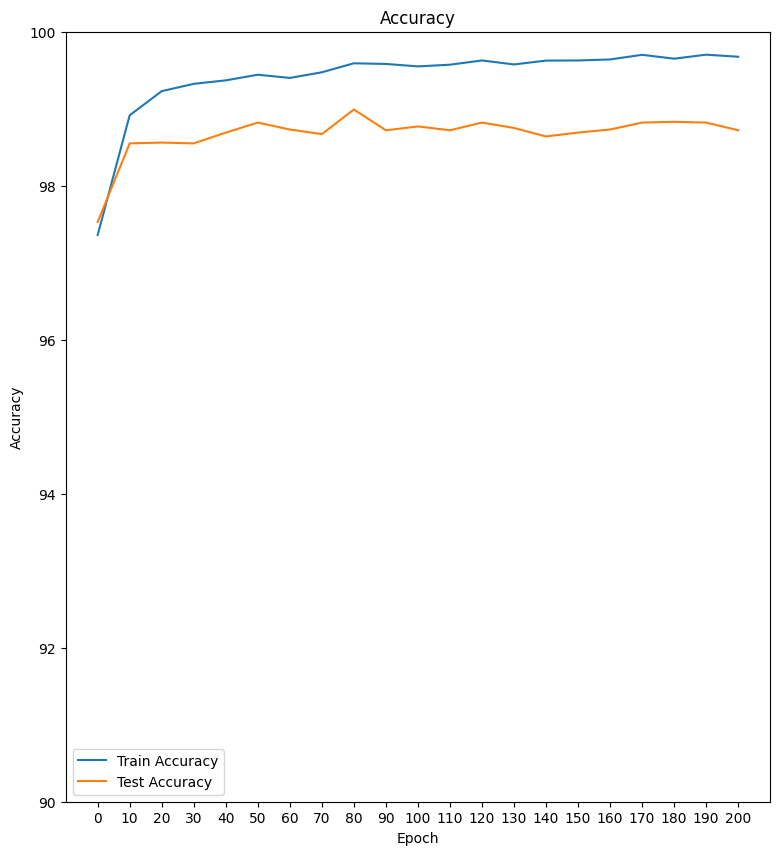

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

# load dataset
train_dataset = MNIST(root='data', train=True, transform=ToTensor(), download=True)
test_dataset = MNIST(root='data', train=False, transform=ToTensor(), download=True)

# create a PyTorch dataloader
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

# define the neural network architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(16)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(32)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2)
        self.flatten = nn.Flatten()
        self.dropout = nn.Dropout(p=0.5)
        self.fc1 = nn.Linear(32 * 7 * 7, 64)
        self.bn3 = nn.BatchNorm1d(64)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(64, 10)
        self.logsoftmax = nn.LogSoftmax(dim=1)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu1(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu2(x)
        x = self.pool2(x)
        x = self.flatten(x)
        x = self.dropout(x)
        x = self.fc1(x)
        x = self.bn3(x)
        x = self.relu3(x)
        x = self.fc2(x)
        x = self.logsoftmax(x)
        return x

# create the neural network model, optimizer and loss function
net = Net()
optimizer = optim.Adam(net.parameters(), lr=0.005)
criterion = nn.CrossEntropyLoss()
# train the model and record accuracy
train_accuracy_list = []
test_accuracy_list = []
k = 4 # k-mini batches
for epoch in range(201):
    for i, (inputs, labels) in enumerate(train_loader, 0):
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        if i % k == k-1: # update weights every k-mini batches
            optimizer.step()
            optimizer.zero_grad()
    
    # calculate and record train and test accuracy every tenth epoch
    if epoch % 10 == 0:
        # calculate train accuracy
        correct = 0
        total = 0
        with torch.no_grad():
            for data in train_loader:
                images, labels = data
                outputs = net(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        train_accuracy = 100 * correct / total
        print('Train Accuracy at epoch %d: %.2f %%' % (epoch+1, train_accuracy))
        train_accuracy_list.append(train_accuracy)

        # calculate test accuracy
        correct = 0
        total = 0
        with torch.no_grad():
            for data in test_loader:
                images, labels = data
                outputs = net(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        test_accuracy = 100 * correct / total
        print('Test Accuracy at epoch %d: %.2f %%' % (epoch+1, test_accuracy))
        test_accuracy_list.append(test_accuracy)

# plot the results
x_axis = [i*10 for i in range(len(train_accuracy_list))]
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(x_axis, train_accuracy_list, label='Train Accuracy')
plt.plot(x_axis, test_accuracy_list, label='Test Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks(x_axis)
plt.legend()

# set y-axis limits
plt.ylim([90, 100])

plt.show()